# Neural Networks 4

## Backbones for deep learning

Backbone is a pre-trained model of multiple layers and often trained with a huge amount of training data for some semantic problem. Backbones are used as off-the-shelf modules to build problem specific models. For example, in

 * Y. Hu, B. Wang, S. Lin (2017): "FC4: Fully Convolutional Color Constancy with Confidence-weighted Pooling". In Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition (CVPR). [PDF](https://openaccess.thecvf.com/content_cvpr_2017/papers/Hu_FC4_Fully_Convolutional_CVPR_2017_paper.pdf)

AlexNet backbone is used as a part in a larger architecture for solving the color constancy (Auto White Balance, AWB) problem important for digital cameras.

<div>
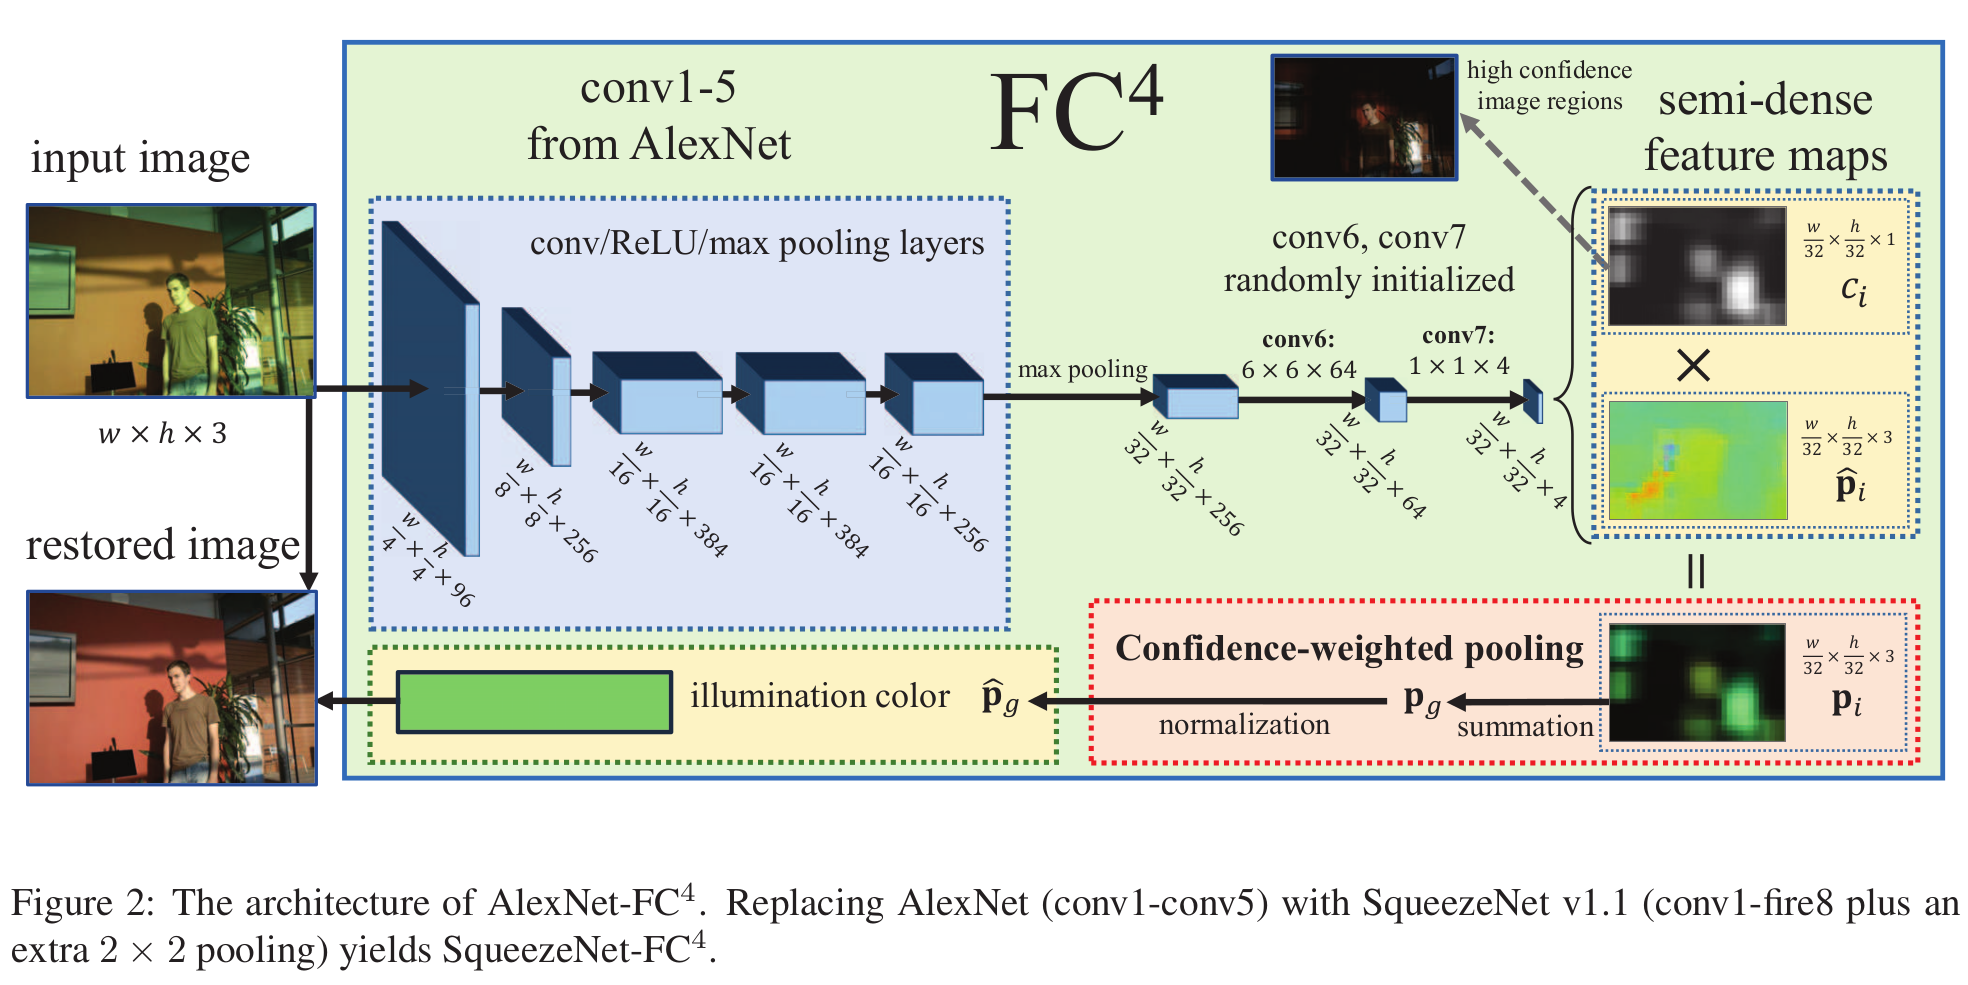
</div>

### Backbone 1: AlexNet

The main driving force that boosted research on deep learning was the AlexNet architecture published in 2012 NeurIPS paper. Many still valid ideas were presented in that paper, and this kind of networks trained for semantic classification tasks and multipurpose tools for computer vision and audio analysis. AlexNet won the ILSVRC 2012 competition and their amazing and worldbreaking results are still available in the ImageNet server:

 * https://www.image-net.org/challenges/LSVRC/2012/results.html

See also the original paper:

 * Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton (2012): "ImageNet Classification with Deep Convolutional Neural Networks". In Proc. of the NeurIPS. URL: https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html

 

<div>
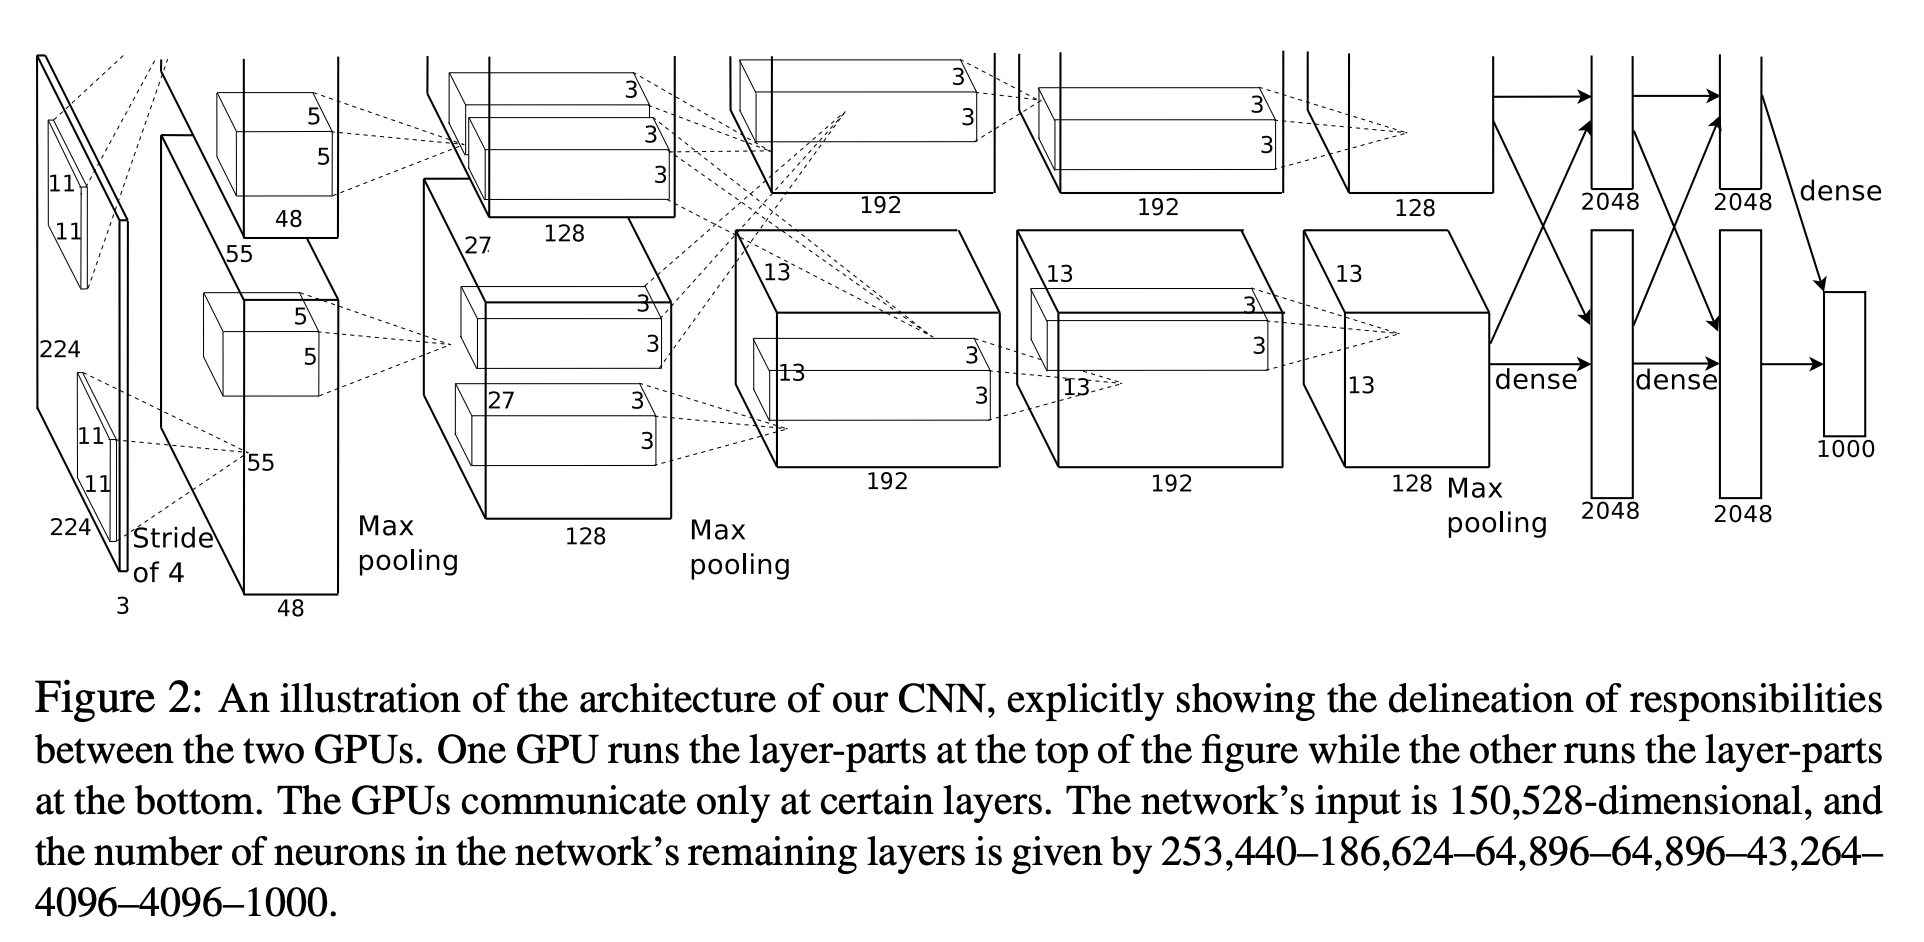
</div>

### Backbone 2: VGGNet

In their paper the Oxford group investigated various strategies to build a better backbone network for image classification and proposed VGGNet which is many ways simplified version of AlexNet.

 * Karen Simonyan, Andrew Zisserman (2015): "Very Deep Convolutional Networks for Large-Scale Image Recognition". In Proc. of the ICLR. URL: https://arxiv.org/abs/1409.1556

<div>
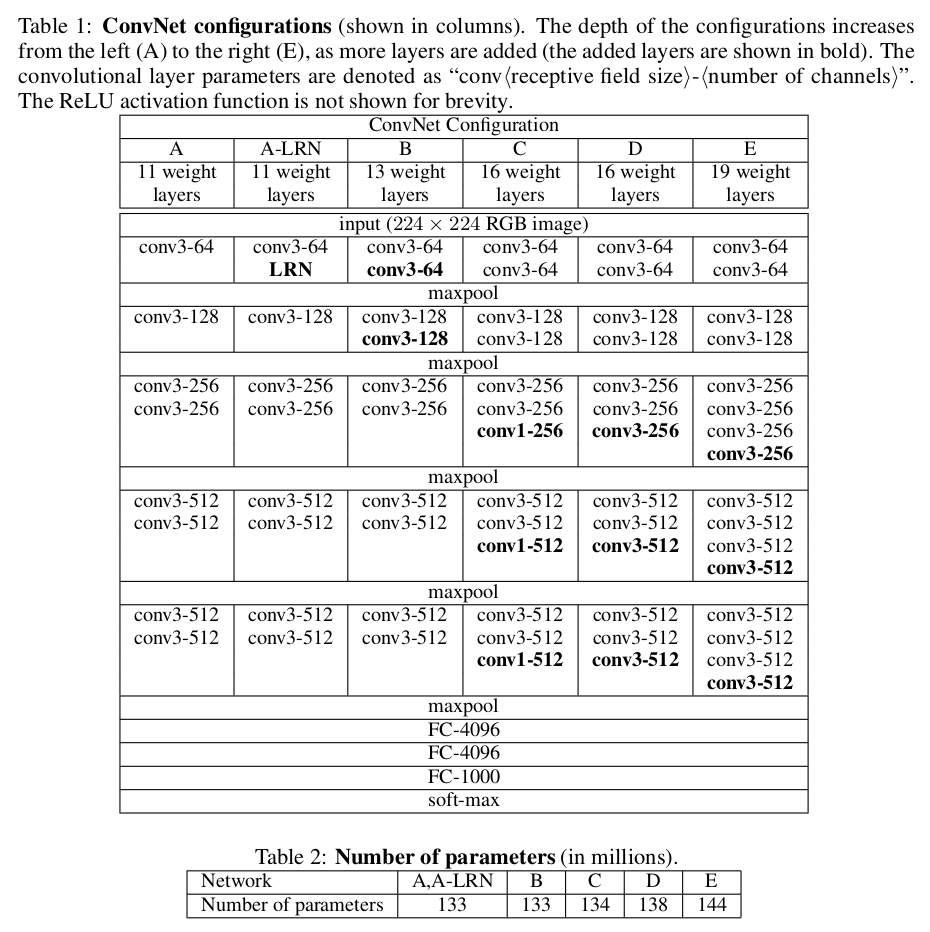
</div>

### Backbone 3: ResNet

 * Kaiming He, Xiangyu Zhang, Shaoqing Ren, Jian Sun (2016): "Deep Residual Learning for Image Recognition". In Proceedings of the IEEE/CVF Conference on Computer Vision and Pattern Recognition (CVPR). [PDF](https://www.cv-foundation.org/openaccess/content_cvpr_2016/papers/He_Deep_Residual_Learning_CVPR_2016_paper.pdf) 

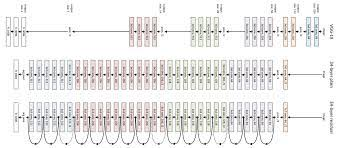

#### Demo: image classification with TF AlexNet

Let's download the VGG16 architecture and it's pre-trained weights. Note that the "16" comes from the number of convolution and full-connected layers.

In [1]:
from keras.applications.vgg16 import VGG16
model = VGG16(weights='imagenet')
print(model.summary())

2023-03-23 11:56:42.471672: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-23 11:56:42.588301: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-23 11:56:42.588341: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-23 11:56:43.206622: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

Let's download one test image and display it. During loading it is converted to the size expected by the architecture input layer.

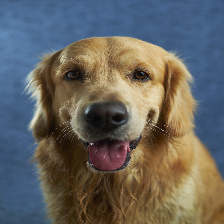

In [2]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = './golden_retriever.jpg'
#There is an interpolation method to match the source size with the target size
#image loaded in PIL (Python Imaging Library)
img = image.load_img(img_path,color_mode='rgb', target_size=(224, 224))
display(img)

Next we convert image to format suitable for TensorFlow.

In [3]:
# Converts a PIL Image to 3D Numy Array
x = image.img_to_array(img)
x.shape
# Adding the fourth dimension, for number of images
x = np.expand_dims(x, axis=0)

Then we do the following:
 * Pre-process the test image (zero mean etc.) to make it correspond the training data
 * Ask the output probabilities of 1000 ImageNet classes
 * Decode outputs to the first best

In [4]:
from tensorflow.keras.applications.vgg16 import preprocess_input,decode_predictions

#mean centering with respect to Image
x = preprocess_input(x)
features = model.predict(x)
p = decode_predictions(features)

1/1 [==============================] - 0s 473ms/step


Finally, let's print the outputs.

In [5]:
print(p)

[[('n02099601', 'golden_retriever', 0.8189114), ('n02099267', 'flat-coated_retriever', 0.028241329), ('n04409515', 'tennis_ball', 0.023568064), ('n02099712', 'Labrador_retriever', 0.019049557), ('n02099849', 'Chesapeake_Bay_retriever', 0.012813703)]]


Backbone networks have many layers where the features specialize from simple features toward more complex and abstract features. For visualization (that is a research topic of its own) see:

 * YouTube: [Jurney on the Deep Dreams](https://www.youtube.com/watch?v=SCE-QeDfXtA)

## References

 * Alex Krizhevsky, Ilya Sutskever, Geoffrey E. Hinton (2012): "ImageNet Classification with Deep Convolutional Neural Networks", in NeurIPS Proceedings. URL: https://papers.nips.cc/paper/2012/hash/c399862d3b9d6b76c8436e924a68c45b-Abstract.html
 * Code example adapted from https://towardsdatascience.com/how-to-use-a-pre-trained-model-vgg-for-image-classification-8dd7c4a4a517